In [ ]:
#From CoinMarketCap.com documentation

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [6]:
type(data)

dict

In [9]:
import pandas as pd
pd.set_option ('display.max_columns', None)
pd.set_option ('display.max_rows', None)

In [10]:
#This normalizes the data and makes it all pretty in a dataframe

df= pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df


C:\Users\Ogros\AppData\Local\Temp\ipykernel_9832\1295293969.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10207,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.937044e+07,1.937044e+07,False,NaN,1,NaN,NaN,None,2023-05-11T17:21:00.000Z,27057.769464,1.908559e+10,17.5627,-0.442710,-0.010802,-6.572293,-10.077386,31.259065,25.197352,5.241210e+11,46.8665,5.682132e+11,None,2023-05-11T17:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-11 17:24:26.436342
1,1027,Ethereum,ETH,ethereum,6862,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203097e+08,1.203097e+08,False,NaN,2,NaN,NaN,None,2023-05-11T17:21:00.000Z,1795.492599,9.611648e+09,28.4620,-0.685120,-0.479330,-4.896212,-5.378243,21.360789,18.119512,2.160151e+11,19.3035,2.160151e+11,None,2023-05-11T17:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-11 17:24:26.436342
2,825,Tether,USDT,tether,53210,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.261246e+10,8.609064e+10,False,NaN,3,NaN,NaN,None,2023-05-11T17:21:00.000Z,1.000461,2.948182e+10,15.5615,0.002767,-0.019737,0.006550,-0.014686,-1.079992,0.025863,8.265055e+10,7.3905,8.613033e+10,None,2023-05-11T17:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-11 17:24:26.436342
3,1839,BNB,BNB,bnb,1353,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558605e+08,1.558605e+08,False,NaN,4,NaN,NaN,None,2023-05-11T17:21:00.000Z,307.132070,5.156589e+08,5.4806,-0.760067,-0.968268,-5.533929,-5.628150,10.494989,0.425304,4.786974e+10,4.2777,4.786974e+10,None,2023-05-11T17:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-11 17:24:26.436342
4,3408,USD Coin,USDC,usd-coin,12358,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.999329e+10,2.999329e+10,False,NaN,5,NaN,NaN,None,2023-05-11T17:21:00.000Z,0.999889,4.391573e+09,26.5216,-0.013183,-0.021994,-0.011122,0.020552,3.995614,0.002702,2.998995e+10,2.6800,2.998995e+10,None,2023-05-11T17:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-11 17:24:26.436342
5,52,XRP,XRP,xrp,944,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.183782e+10,9.998897e+10,False,NaN,6,NaN,NaN,None,2023-05-11T17:21:00.000Z,0.417813,9.789905e+08,4.8247,-0.480570,-0.720232,-8.647048,-18.771741,17.836825,10.315287,2.165851e+10,1.9354,4.178129e+10,None,2023-05-11T17:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-11 17:24:26.436342
6,2010,Cardano,ADA,cardano,783,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.484179e+10,3.577770e+10,False,NaN,7,NaN,NaN,None,2023-05-11T17:21:00.000Z,0.353505,2.887842e+08,12.4862,-0.401949,-3.320859,-9.312814,-11.393218,14.730788,-1.361748,1.231674e+10,1.1014,1.590772e+10,None,2023-05-11T17:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-11 17:24:26.436342
7,74,Dogecoin,DOGE,dogecoin,703,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.393034e+11,1.393034e+11,False,NaN,8,NaN,NaN,None,2023-05-11T17:21:00.000Z,0.070662,3.238524e+08,27.9305,-0.489458,-2.005688,-9.997438,-16.315710,6.129662,-12.851007,9.843429e+09,0.8796,9.843429e+09,None,2023-05-11T17:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-11 17:24:26.436342
8,5426,Solana,SOL,solana,459,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",

In [11]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2= pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\Ogros\Desktop\Alex Bootcamp\Python\API\API.csv'):
        df.to_csv(r'C:\Users\Ogros\Desktop\Alex Bootcamp\Python\API\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Ogros\Desktop\Alex Bootcamp\Python\API\API.csv', mode='a', header = False)

In [46]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed succesfully')
    sleep(60) #sleep for 01 minute
exit()

C:\Users\Ogros\AppData\Local\Temp\ipykernel_9832\185760146.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')


API runner completed succesfully


C:\Users\Ogros\AppData\Local\Temp\ipykernel_9832\185760146.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')


API runner completed succesfully


C:\Users\Ogros\AppData\Local\Temp\ipykernel_9832\185760146.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')


API runner completed succesfully


KeyboardInterrupt: 

In [47]:
df72 = pd.read_csv(r'C:\Users\Ogros\Desktop\Alex Bootcamp\Python\API\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10207,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19369275.00000,19369275.00000,False,NaN,1,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,28166.15452,15398447186.60688,-4.92950,0.24127,2.71847,-0.54817,-1.03010,39.05262,24.52887,545557992591.08752,47.11810,591489244920.77002,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
1,1,1027,Ethereum,ETH,ethereum,6858,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120317700.84569,120317700.84569,False,NaN,2,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,1873.73230,7109435784.27899,-5.90000,0.09611,1.79229,1.06268,0.60345,29.91312,14.77717,225443162147.48639,19.46880,225443162147.48999,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
2,2,825,Tether,USDT,tether,53102,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,82491900635.54085,86090638896.21469,False,NaN,3,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,1.00053,24369090943.58615,-9.75660,-0.00734,-0.01358,0.01051,-0.01221,-0.80077,0.04214,82535900306.28520,7.12760,86136558068.11000,NaN,2023-05-10T16:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-10 16:01:36.606195
3,3,1839,BNB,BNB,bnb,1350,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155860702.54839,155860702.54839,False,NaN,4,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,315.07883,481156691.57641,-4.87430,0.04846,0.77460,-2.44363,0.87873,14.65047,-1.21759,49108407464.34603,4.24090,49108407464.35000,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
4,4,3408,USD Coin,USDC,usd-coin,12321,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,30084042218.53992,30084042218.53992,False,NaN,5,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,1.00004,3334462342.77810,-6.08950,-0.01069,-0.00393,-0.00676,0.00932,8.60537,0.00688,30085192168.82334,2.59810,30085192168.82000,NaN,2023-05-10T16:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-10 16:01:36.606195
5,5,52,XRP,XRP,xrp,942,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51837820505.00000,99988965239.00000,False,NaN,6,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,0.43019,901856169.15924,-20.30730,-0.03674,1.73608,-5.08846,-14.79549,18.05346,6.94594,22300048568.66686,1.92580,43018877629.15000,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
6,6,2010,Cardano,ADA,cardano,782,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34841944878.31800,35761344982.35800,False,NaN,7,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,0.37022,236478685.81947,-11.63280,0.39671,2.36454,-2.87949,-4.84093,20.70762,-4.25056,12899166473.09592,1.11390,16659876287.52000,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
7,7,74,Dogecoin,DOGE,dogecoin,703,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139288606383.70526,139288606383.70526,False,NaN,8,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,0.07400,242396497.12847,-38.78160,0.13012,1.85295,-4.81077,-11.06062,14.50022,-16.07693,10307857495.60428,0.89020,10307857495.60000,NaN,2023-05-10T16

In [48]:
#Fixing the format
pd.set_option ('display.float_format', lambda x: '%.5f' % x)

In [49]:
df72 = pd.read_csv(r'C:\Users\Ogros\Desktop\Alex Bootcamp\Python\API\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10207,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19369275.00000,19369275.00000,False,NaN,1,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,28166.15452,15398447186.60688,-4.92950,0.24127,2.71847,-0.54817,-1.03010,39.05262,24.52887,545557992591.08752,47.11810,591489244920.77002,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
1,1,1027,Ethereum,ETH,ethereum,6858,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120317700.84569,120317700.84569,False,NaN,2,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,1873.73230,7109435784.27899,-5.90000,0.09611,1.79229,1.06268,0.60345,29.91312,14.77717,225443162147.48639,19.46880,225443162147.48999,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
2,2,825,Tether,USDT,tether,53102,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,82491900635.54085,86090638896.21469,False,NaN,3,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,1.00053,24369090943.58615,-9.75660,-0.00734,-0.01358,0.01051,-0.01221,-0.80077,0.04214,82535900306.28520,7.12760,86136558068.11000,NaN,2023-05-10T16:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-10 16:01:36.606195
3,3,1839,BNB,BNB,bnb,1350,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155860702.54839,155860702.54839,False,NaN,4,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,315.07883,481156691.57641,-4.87430,0.04846,0.77460,-2.44363,0.87873,14.65047,-1.21759,49108407464.34603,4.24090,49108407464.35000,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
4,4,3408,USD Coin,USDC,usd-coin,12321,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,30084042218.53992,30084042218.53992,False,NaN,5,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,1.00004,3334462342.77810,-6.08950,-0.01069,-0.00393,-0.00676,0.00932,8.60537,0.00688,30085192168.82334,2.59810,30085192168.82000,NaN,2023-05-10T16:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-10 16:01:36.606195
5,5,52,XRP,XRP,xrp,942,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51837820505.00000,99988965239.00000,False,NaN,6,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,0.43019,901856169.15924,-20.30730,-0.03674,1.73608,-5.08846,-14.79549,18.05346,6.94594,22300048568.66686,1.92580,43018877629.15000,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
6,6,2010,Cardano,ADA,cardano,782,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34841944878.31800,35761344982.35800,False,NaN,7,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,0.37022,236478685.81947,-11.63280,0.39671,2.36454,-2.87949,-4.84093,20.70762,-4.25056,12899166473.09592,1.11390,16659876287.52000,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
7,7,74,Dogecoin,DOGE,dogecoin,703,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139288606383.70526,139288606383.70526,False,NaN,8,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,0.07400,242396497.12847,-38.78160,0.13012,1.85295,-4.81077,-11.06062,14.50022,-16.07693,10307857495.60428,0.89020,10307857495.60000,NaN,2023-05-10T16

In [50]:
#Group Crypto Currencies
df3= df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.44271,-0.01080,-6.57229,-10.07739,31.25906,25.19735
Ethereum,-0.68512,-0.47933,-4.89621,-5.37824,21.36079,18.11951
Tether,0.00277,-0.01974,0.00655,-0.01469,-1.07999,0.02586
BNB,-0.76007,-0.96827,-5.53393,-5.62815,10.49499,0.42530
USD Coin,-0.01318,-0.02199,-0.01112,0.02055,3.99561,0.00270
XRP,-0.48057,-0.72023,-8.64705,-18.77174,17.83682,10.31529
Cardano,-0.40195,-3.32086,-9.31281,-11.39322,14.73079,-1.36175
Dogecoin,-0.48946,-2.00569,-9.99744,-16.31571,6.12966,-12.85101
Solana,-0.30534,-2.04736,-8.48205,-13.54835,10.33261,-2.81303


In [51]:
df4= df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.44271
             quote.USD.percent_change_24h    -0.01080
             quote.USD.percent_change_7d     -6.57229
             quote.USD.percent_change_30d   -10.07739
             quote.USD.percent_change_60d    31.25906
             quote.USD.percent_change_90d    25.19735
Ethereum     quote.USD.percent_change_1h     -0.68512
             quote.USD.percent_change_24h    -0.47933
             quote.USD.percent_change_7d     -4.89621
             quote.USD.percent_change_30d    -5.37824
             quote.USD.percent_change_60d    21.36079
             quote.USD.percent_change_90d    18.11951
Tether       quote.USD.percent_change_1h      0.00277
             quote.USD.percent_change_24h    -0.01974
             quote.USD.percent_change_7d      0.00655
             quote.USD.percent_change_30d    -0.01469
             quote.USD.percent_change_60d    -1.07999
             quote.USD.percent_change_90

In [19]:
type(df4)

pandas.core.series.Series

In [52]:
df5=df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.44271
            quote.USD.percent_change_24h  -0.01080
            quote.USD.percent_change_7d   -6.57229
            quote.USD.percent_change_30d -10.07739
            quote.USD.percent_change_60d  31.25906
            quote.USD.percent_change_90d  25.19735
Ethereum    quote.USD.percent_change_1h   -0.68512
            quote.USD.percent_change_24h  -0.47933
            quote.USD.percent_change_7d   -4.89621
            quote.USD.percent_change_30d  -5.37824
            quote.USD.percent_change_60d  21.36079
            quote.USD.percent_change_90d  18.11951
Tether      quote.USD.percent_change_1h    0.00277
            quote.USD.percent_change_24h  -0.01974
            quote.USD.percent_change_7d    0.00655
            quote.USD.percent_change_30d  -0.01469
            quote.USD.percent_change_60d  -1.07999
            quote.USD.percent_change_90d   0.02586
BNB         quote.USD.percent_change_1h   -0.76007
            quote.USD.percent_change_24h  -0.96827
            quote.USD.percent_change_7d   -5.53393
            quote.USD.percent_change_30d  -5.62815
            quote.USD.percent_change_60d  10.49499
            quote.USD.percent_change_90d   0.42530
USD Coin    quote.USD.percent_change_1h   -0.01318
            quote.USD.percent_change_24h  -0.02199
            quote.USD.percent_change_7d   -0.01112
            quote.USD.percent_change_30d   0.02055
            quote.USD.percent_change_60d   3.99561
            quote.USD.percent_change_90d   0.00270
XRP         quote.USD.percent_change_1h   -0.48057
            quote.USD.percent_change_24h  -0.72023
            quote.USD.percent_change_7d   -8.64705
            quote.USD.percent_change_30d -18.77174
            quote.USD.percent_change_60d  17.83682
            quote.USD.percent_change_90d  10.31529
Cardano     quote.USD.percent_change_1h   -0.40195
            quote.USD.percent_change_24h  -3.32086
            quote.USD.percent_change_7d   -9.31281
            quote.USD.percent_change_30d -11.39322
            quote.USD.percent_change_60d  14.73079
            quote.USD.percent_change_90d  -1.36175
Dogecoin    quote.USD.percent_change_1h   -0.48946
            quote.USD.percent_change_24h  -2.00569
            quote.USD.percent_change_7d   -9.99744
            quote.USD.percent_change_30d -16.31571
            quote.USD.percent_change_60d   6.12966
            quote.USD.percent_change_90d -12.85101
Solana      quote.USD.percent_change_1h   -0.30534
            quote.USD.percent_change_24h  -2.04736
            quote.USD.percent_change_7d   -8.48205
            quote.USD.percent_change_30d -13.54835
            quote.USD.percent_change_60d  10.33261
            quote.USD.percent_change_90d  -2.81303
Polygon     quote.USD.percent_change_1h   -0.68631
            quote.USD.percent_change_24h  -2.00343
            quote.USD.percent_change_7d  -14.55251
            quote.USD.percent_change_30d -24.55143
            quote.USD.percent_change_60d -22.18395
            quote.USD.percent_change_90d -33.15333
Polkadot    quote.USD.percent_change_1h   -0.48934
            quote.USD.percent_change_24h  -1.34183
            quote.USD.percent_change_7d   -7.31598
            quote.USD.percent_change_30d -17.84030
            quote.USD.percent_change_60d  -3.61324
            quote.USD.percent_change_90d -14.48140
TRON        quote.USD.percent_change_1h   -0.31269
            quote.USD.percent_change_24h  -1.29992
            quote.USD.percent_change_7d   -1.72263
            quote.USD.percent_change_30d   3.48700
            quote.USD.percent_change_60d  13.75258
            quote.USD.percent_change_90d   7.63442
Litecoin    quote.USD.percent_change_1h   -1.44751
            quote.USD.percent_change_24h   0.68049
            quote.USD.percent_change_7d   -9.51425
            quote.USD.percent_change_30d -15.84896
            quote.USD.percent_change_60d  15.25022
            quo

In [23]:
df5.count()

values    90
dtype: int64

In [53]:
index=pd.Index(range(90))
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.44271
1,Bitcoin,quote.USD.percent_change_24h,-0.01080
2,Bitcoin,quote.USD.percent_change_7d,-6.57229
3,Bitcoin,quote.USD.percent_change_30d,-10.07739
4,Bitcoin,quote.USD.percent_change_60d,31.25906
5,Bitcoin,quote.USD.percent_change_90d,25.19735
6,Ethereum,quote.USD.percent_change_1h,-0.68512
7,Ethereum,quote.USD.percent_change_24h,-0.47933
8,Ethereum,quote.USD.percent_change_7d,-4.89621
9,Ethereum,quote.USD.percent_change_30d,-5.37824


In [54]:
df7=df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.44271
1,Bitcoin,quote.USD.percent_change_24h,-0.01080
2,Bitcoin,quote.USD.percent_change_7d,-6.57229
3,Bitcoin,quote.USD.percent_change_30d,-10.07739
4,Bitcoin,quote.USD.percent_change_60d,31.25906
5,Bitcoin,quote.USD.percent_change_90d,25.19735
6,Ethereum,quote.USD.percent_change_1h,-0.68512
7,Ethereum,quote.USD.percent_change_24h,-0.47933
8,Ethereum,quote.USD.percent_change_7d,-4.89621
9,Ethereum,quote.USD.percent_change_30d,-5.37824


In [55]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1,-0.44271
1,Bitcoin,24h,-0.01080
2,Bitcoin,7d,-6.57229
3,Bitcoin,30d,-10.07739
4,Bitcoin,60d,31.25906
5,Bitcoin,90d,25.19735
6,Ethereum,1,-0.68512
7,Ethereum,24h,-0.47933
8,Ethereum,7d,-4.89621
9,Ethereum,30d,-5.37824


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

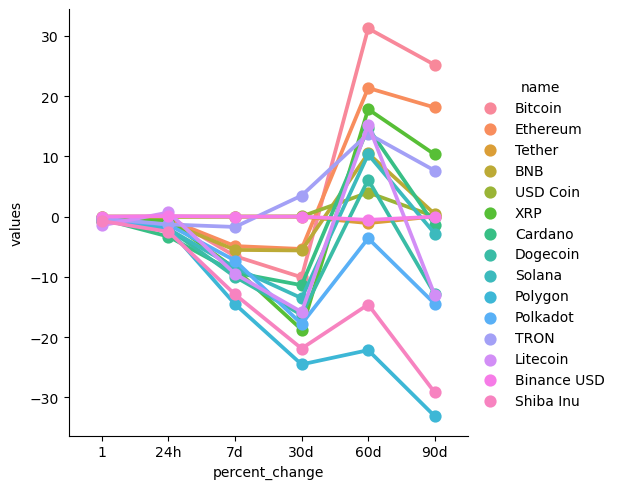

In [41]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [56]:
df10= df[['name', 'quote.USD.price', 'timestamp']]
df10= df10.query("name== 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,27057.76946,2023-05-11 17:24:26.436342


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

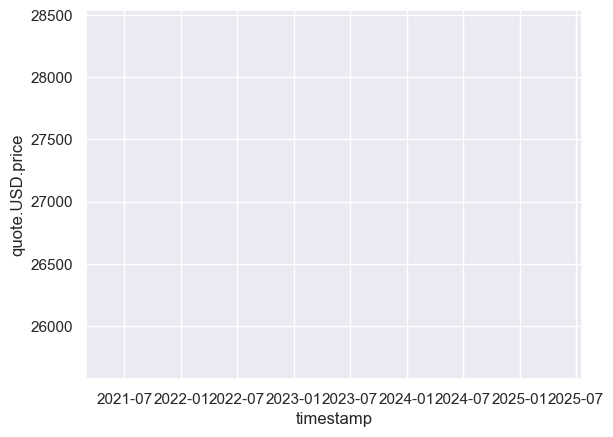

In [58]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)